## Final Project Submission

Please fill out:
* Student name: Ian Butler
* Student pace: full time
* Scheduled project review date/time: 08/05/2022 02:00 PM
* Instructor name: David Elliott
* Blog post URL:


#### 1. Drop Irrelevant Columns

#### 2. Handle Missing Values

#### 3. Convert Categorical Features into Numbers

#### 4. Preprocess Test Data

In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Lab Setup

### Getting the Data

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
data
halfway-there.gif
student.ipynb


In [4]:
cd data

C:\Users\ianbu\Documents\Flatiron\dsc-phase-2-project-v2-3\data


In [5]:
!ls

column_names.md
kc_house_data.csv


In [6]:
cd ..

C:\Users\ianbu\Documents\Flatiron\dsc-phase-2-project-v2-3


In [7]:
file_path = './data/kc_house_data.csv'
original_df = pd.read_csv(file_path)
original_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df = original_df.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
y = df["price"]
X = df.drop("price", axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 16197 rows and 20 columns
y_train is a Series with 16197 values


#### Fitting a Model

In [12]:
model = LinearRegression()
# model.fit(X_train, y_train)

## 1. Drop Irrelevant Columns

In [13]:
relevant_columns = [
    'id',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'condition',
    'grade',
    'yr_built',
]

X_train = X_train[relevant_columns]

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6405,3905080280,3,2.50,1880,4499,2.0,NO,Average,8 Good,1993
937,5466420030,3,2.50,2020,6564,1.0,NO,Average,7 Average,1994
19076,2623069010,5,4.00,4720,493534,2.0,NO,Very Good,9 Better,1975
15201,4443800545,2,2.00,1430,3880,1.0,NO,Good,7 Average,1949
13083,9485930120,3,2.25,2270,32112,1.0,NO,Good,8 Good,1980


In [14]:
assert X_train.shape[0] == 16197

assert X_train.shape[1] == len(relevant_columns)

## 2. Handle Missing Values

In [15]:
X_train.isna().sum()

id                0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     1756
condition         0
grade             0
yr_built          0
dtype: int64

### Waterfront

In [16]:
X_train["waterfront"].value_counts()

NO     14330
YES      111
Name: waterfront, dtype: int64

In [17]:
X_train["waterfront"].isna().value_counts()

False    14441
True      1756
Name: waterfront, dtype: int64

In [18]:
X_train[X_train["waterfront"].isna()].head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
10881,9407100310,3,2.50,1260,11877,1.0,NaN,Average,7 Average,1975
14092,3211600650,3,1.00,1000,8018,1.0,NaN,Average,7 Average,1969
19429,582000644,4,2.00,1990,6000,1.0,NaN,Average,9 Better,1956
2264,522049104,5,1.75,2340,9148,2.0,NaN,Average,7 Average,1957
9558,1310700210,3,1.75,1970,10270,1.0,NaN,Good,8 Good,1966


In [19]:
X_train['waterfront'] = X_train['waterfront'].fillna('NO')
X_train[X_train["waterfront"].isna()].head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built


In [20]:
X_train["waterfront"].isna().value_counts()

False    16197
Name: waterfront, dtype: int64

In [21]:
X_train["waterfront"].value_counts()

NO     16086
YES      111
Name: waterfront, dtype: int64

In [22]:
X_train.isna().sum()

id             0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [23]:
assert X_train.shape[0] == 16197

assert X_train.shape[1] == len(relevant_columns)

## 3. Convert Categorical Features into Numbers

In [24]:
# model.fit(X_train, y_train)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           16197 non-null  int64  
 1   bedrooms     16197 non-null  int64  
 2   bathrooms    16197 non-null  float64
 3   sqft_living  16197 non-null  int64  
 4   sqft_lot     16197 non-null  int64  
 5   floors       16197 non-null  float64
 6   waterfront   16197 non-null  object 
 7   condition    16197 non-null  object 
 8   grade        16197 non-null  object 
 9   yr_built     16197 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.4+ MB


In [26]:
print(X_train['waterfront'].value_counts())
print()
print(X_train['condition'].value_counts())
print()
print(X_train['grade'].value_counts())

NO     16086
YES      111
Name: waterfront, dtype: int64

Average      10525
Good          4238
Very Good     1287
Fair           129
Poor            18
Name: condition, dtype: int64

7 Average        6718
8 Good           4608
9 Better         1936
6 Low Average    1506
10 Very Good      851
11 Excellent      295
5 Fair            188
12 Luxury          69
4 Low              17
13 Mansion          8
3 Poor              1
Name: grade, dtype: int64


### Binary Categories

In [27]:
waterfront_train = X_train[['waterfront']]

encoder_waterfront = OrdinalEncoder()

encoder_waterfront.fit(waterfront_train)

encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [28]:
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

waterfront_encoded_train = waterfront_encoded_train.flatten()

waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
X_train['waterfront'] = waterfront_encoded_train

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6405,3905080280,3,2.50,1880,4499,2.0,0.0,Average,8 Good,1993
937,5466420030,3,2.50,2020,6564,1.0,0.0,Average,7 Average,1994
19076,2623069010,5,4.00,4720,493534,2.0,0.0,Very Good,9 Better,1975
15201,4443800545,2,2.00,1430,3880,1.0,0.0,Good,7 Average,1949
13083,9485930120,3,2.25,2270,32112,1.0,0.0,Good,8 Good,1980


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           16197 non-null  int64  
 1   bedrooms     16197 non-null  int64  
 2   bathrooms    16197 non-null  float64
 3   sqft_living  16197 non-null  int64  
 4   sqft_lot     16197 non-null  int64  
 5   floors       16197 non-null  float64
 6   waterfront   16197 non-null  float64
 7   condition    16197 non-null  object 
 8   grade        16197 non-null  object 
 9   yr_built     16197 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.4+ MB


### Multiple Categories

In [31]:
condition_train = X_train[['condition']]

condition_ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

condition_ohe.fit(condition_train)

condition_ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [32]:
condition_encoded_train = condition_ohe.transform(condition_train)

condition_encoded_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [33]:
condition_encoded_train = pd.DataFrame(
    condition_encoded_train,
    columns=condition_ohe.categories_[0],
    index=X_train.index
)

condition_encoded_train.head()

,Average,Fair,Good,Poor,Very Good
6405,1.0,0.0,0.0,0.0,0.0
937,1.0,0.0,0.0,0.0,0.0
19076,0.0,0.0,0.0,0.0,1.0
15201,0.0,0.0,1.0,0.0,0.0
13083,0.0,0.0,1.0,0.0,0.0


In [34]:
X_train.drop('condition', axis=1, inplace=True)

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built
6405,3905080280,3,2.50,1880,4499,2.0,0.0,8 Good,1993
937,5466420030,3,2.50,2020,6564,1.0,0.0,7 Average,1994
19076,2623069010,5,4.00,4720,493534,2.0,0.0,9 Better,1975
15201,4443800545,2,2.00,1430,3880,1.0,0.0,7 Average,1949
13083,9485930120,3,2.25,2270,32112,1.0,0.0,8 Good,1980


In [35]:
X_train = pd.concat([X_train, condition_encoded_train], axis=1)

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,Average,Fair,Good,Poor,Very Good
6405,3905080280,3,2.50,1880,4499,2.0,0.0,8 Good,1993,1.0,0.0,0.0,0.0,0.0
937,5466420030,3,2.50,2020,6564,1.0,0.0,7 Average,1994,1.0,0.0,0.0,0.0,0.0
19076,2623069010,5,4.00,4720,493534,2.0,0.0,9 Better,1975,0.0,0.0,0.0,0.0,1.0
15201,4443800545,2,2.00,1430,3880,1.0,0.0,7 Average,1949,0.0,0.0,1.0,0.0,0.0
13083,9485930120,3,2.25,2270,32112,1.0,0.0,8 Good,1980,0.0,0.0,1.0,0.0,0.0


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           16197 non-null  int64  
 1   bedrooms     16197 non-null  int64  
 2   bathrooms    16197 non-null  float64
 3   sqft_living  16197 non-null  int64  
 4   sqft_lot     16197 non-null  int64  
 5   floors       16197 non-null  float64
 6   waterfront   16197 non-null  float64
 7   grade        16197 non-null  object 
 8   yr_built     16197 non-null  int64  
 9   Average      16197 non-null  float64
 10  Fair         16197 non-null  float64
 11  Good         16197 non-null  float64
 12  Poor         16197 non-null  float64
 13  Very Good    16197 non-null  float64
dtypes: float64(8), int64(5), object(1)
memory usage: 1.9+ MB


In [37]:
# model.fit(X_train, y_train)

In [38]:
grade_train = X_train[['grade']]

grade_ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

grade_ohe.fit(grade_train)

grade_ohe.categories_

[array(['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion',
        '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average',
        '8 Good', '9 Better'], dtype=object)]

In [39]:
grade_encoded_train = grade_ohe.transform(grade_train)

grade_encoded_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [40]:
grade_encoded_train = pd.DataFrame(
    grade_encoded_train,
    columns=grade_ohe.categories_[0],
    index=X_train.index
)

grade_encoded_train.head()

,10 Very Good,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
6405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
X_train.drop('grade', axis=1, inplace=True)

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Average,Fair,Good,Poor,Very Good
6405,3905080280,3,2.50,1880,4499,2.0,0.0,1993,1.0,0.0,0.0,0.0,0.0
937,5466420030,3,2.50,2020,6564,1.0,0.0,1994,1.0,0.0,0.0,0.0,0.0
19076,2623069010,5,4.00,4720,493534,2.0,0.0,1975,0.0,0.0,0.0,0.0,1.0
15201,4443800545,2,2.00,1430,3880,1.0,0.0,1949,0.0,0.0,1.0,0.0,0.0
13083,9485930120,3,2.25,2270,32112,1.0,0.0,1980,0.0,0.0,1.0,0.0,0.0


In [42]:
X_train = pd.concat([X_train, grade_encoded_train], axis=1)

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Average,Fair,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
6405,3905080280,3,2.50,1880,4499,2.0,0.0,1993,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,5466420030,3,2.50,2020,6564,1.0,0.0,1994,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19076,2623069010,5,4.00,4720,493534,2.0,0.0,1975,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,4443800545,2,2.00,1430,3880,1.0,0.0,1949,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13083,9485930120,3,2.25,2270,32112,1.0,0.0,1980,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   yr_built       16197 non-null  int64  
 8   Average        16197 non-null  float64
 9   Fair           16197 non-null  float64
 10  Good           16197 non-null  float64
 11  Poor           16197 non-null  float64
 12  Very Good      16197 non-null  float64
 13  10 Very Good   16197 non-null  float64
 14  11 Excellent   16197 non-null  float64
 15  12 Luxury      16197 non-null  float64
 16  13 Mansion     16197 non-null  float64
 17  3 Poor         16197 non-null  float64
 18  4 L

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
cross_val_score(model, X_train, y_train, cv=3)

array([0.6803795 , 0.67940675, 0.65468144])

## 4. Preprocess Test Data

*Drop Irrelevant Columns*

In [46]:
X_test = X_test.loc[:, relevant_columns]

*Handle Missing Values*

In [47]:
X_test['waterfront'] = X_test['waterfront'].fillna('NO')

X_test.isna().sum()

id             0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

*Convert Categorical Features into Numbers*

In [48]:
waterfront_test = X_test[['waterfront']]
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test).flatten()
X_test['waterfront'] = waterfront_encoded_test

condition_test = X_test[['condition']]
condition_encoded_test = condition_ohe.transform(condition_test)
condition_encoded_test = pd.DataFrame(
    condition_encoded_test,
    columns=condition_ohe.categories_[0],
    index=X_test.index
)
X_test.drop('condition', axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)

grade_test = X_test[['grade']]
grade_encoded_test = grade_ohe.transform(grade_test)
grade_encoded_test = pd.DataFrame(
    grade_encoded_test,
    columns=grade_ohe.categories_[0],
    index=X_test.index
)
X_test.drop('grade', axis=1, inplace=True)
X_test = pd.concat([X_test, grade_encoded_test], axis=1)

X_test.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Average,Fair,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
3686,6303401050,3,0.75,850,8573,1.0,0.0,1945,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10247,1995200200,3,1.00,1510,6083,1.0,0.0,1940,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4037,1423089118,4,2.25,1790,42000,1.0,0.0,1983,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3437,9349900110,2,1.50,1140,2500,1.0,0.0,1988,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19291,455000395,3,1.00,1500,3920,1.0,0.0,1947,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6484148342563683

## Exploratory Data Analysis

In [50]:
# sns.pairplot(df);

In [51]:
# sns.pairplot(X_train, vars=('id',
#                             'bedrooms',
#                             'bathrooms',
#                             'sqft_living',
#                             'sqft_lot',
#                             'floors',
#                             'waterfront',
#                             'yr_built'));

In [52]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [53]:
abs(df.corr()) > 0.70

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [54]:
abs_corr_df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

abs_corr_df['pairs'] = list(zip(abs_corr_df.level_0, abs_corr_df.level_1))

abs_corr_df.set_index(['pairs'], inplace = True)

abs_corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

abs_corr_df.columns = ['cc']

abs_corr_df.drop_duplicates(inplace=True)

In [55]:
abs_corr_df[(abs_corr_df.cc>.70) & (abs_corr_df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot, sqft_lot15)",0.718204
"(price, sqft_living)",0.701917


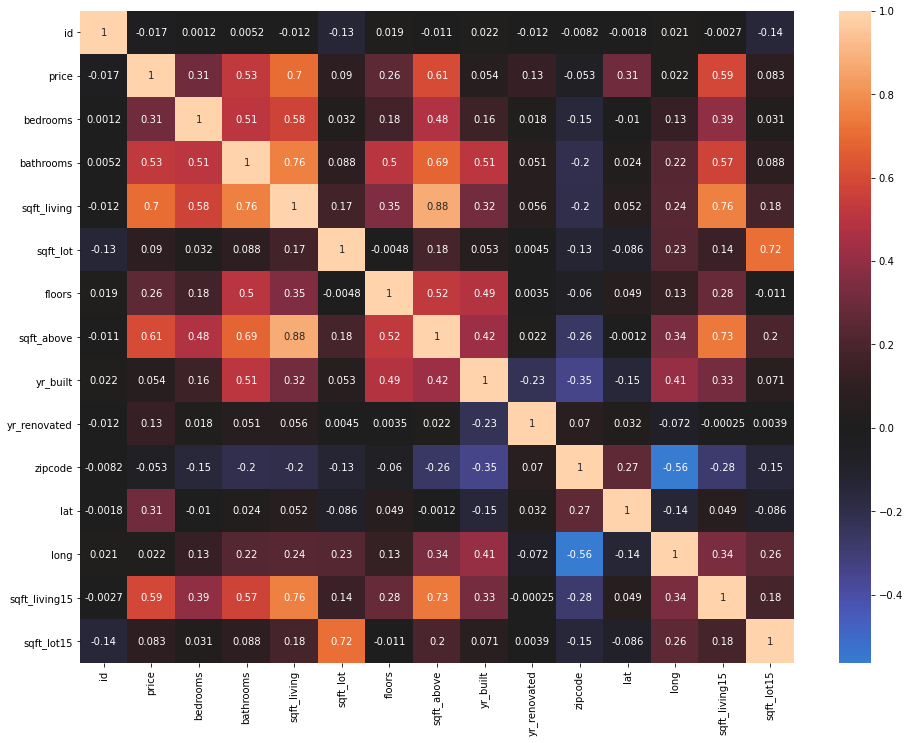

In [56]:
fig, ax = plt.subplots(figsize = (16, 12))
sns.heatmap(df.corr(), center=0, annot=True);

In [57]:
X_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Average,Fair,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
id,1.000000,0.004282,0.008268,-0.007991,-0.136131,0.023808,-0.008983,0.020668,0.029956,-0.010282,...,-0.016813,-0.019361,-0.005179,-0.005922,-0.006179,-0.030493,-0.007459,-0.014268,0.032849,0.012750
bedrooms,0.004282,1.000000,0.529181,0.594505,0.039387,0.184185,0.005520,0.158796,0.009327,-0.043716,...,0.122414,0.068346,0.030741,-0.020576,-0.061727,-0.117698,-0.242557,-0.112686,0.079117,0.160786
bathrooms,0.008268,0.529181,1.000000,0.759379,0.090240,0.502708,0.068039,0.499490,0.188717,-0.077115,...,0.241006,0.164425,0.080749,-0.013980,-0.051463,-0.140264,-0.366248,-0.314767,0.191584,0.261389
sqft_living,-0.007991,0.594505,0.759379,1.000000,0.182949,0.353248,0.106179,0.315332,0.097408,-0.061446,...,0.337957,0.243732,0.127652,-0.013382,-0.048848,-0.128622,-0.313018,-0.358396,0.069746,0.320633
sqft_lot,-0.136131,0.039387,0.090240,0.182949,1.000000,-0.002653,0.020322,0.057911,-0.003968,0.022088,...,0.075993,0.045738,0.006462,-0.000403,-0.001644,0.003254,-0.020154,-0.065237,-0.023880,0.048484
floors,0.023808,0.184185,0.502708,0.353248,-0.002653,1.000000,0.020885,0.488890,0.316881,-0.056320,...,0.117078,0.058516,0.015640,-0.007193,-0.027909,-0.082138,-0.229175,-0.309714,0.203110,0.242502
waterfront,-0.008983,0.005520,0.068039,0.106179,0.020322,0.020885,1.000000,-0.024862,-0.020597,0.000976,...,0.072632,0.074999,-0.001847,-0.000653,-0.002693,-0.002015,-0.003404,-0.044110,-0.007596,0.003996
yr_built,0.020668,0.158796,0.499490,0.315332,0.057911,0.488890,-0.024862,1.000000,0.394834,-0.067306,...,0.095729,0.046150,0.002733,-0.013671,-0.040985,-0.132795,-0.309215,-0.205864,0.194570,0.218740
Average,0.029956,0.009327,0.188717,0.097408,-0.003968,0.316881,-0.020597,0.394834,1.000000,-0.122055,...,0.048689,0.018209,0.004669,-0.010704,-0.008181,-0.052158,-0.096986,-0.117014,0.073916,0.105710
Fair,-0.010282,-0.043716,-0.077115,-0.061446,0.022088,-0.056320,0.000976,-0.067306,-0.122055,1.000000,...,-0.012204,-0.005861,-0.001992,-0.000704,0.061448,0.061623,0.074158,0.006337,-0.041105,-0.028731


In [58]:
abs(X_train.corr()) > 0.70

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Average,Fair,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Average,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Fair,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [59]:
abs_corr_X=X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

abs_corr_X['pairs'] = list(zip(abs_corr_X.level_0, abs_corr_X.level_1))

abs_corr_X.set_index(['pairs'], inplace = True)

abs_corr_X.drop(columns=['level_1', 'level_0'], inplace = True)

abs_corr_X.columns = ['cc']

abs_corr_X.drop_duplicates(inplace=True)

In [60]:
abs_corr_X[(abs_corr_X.cc>.70) & (abs_corr_X.cc <1)]

,cc
pairs,
"(Good, Average)",0.810916
"(sqft_living, bathrooms)",0.759379


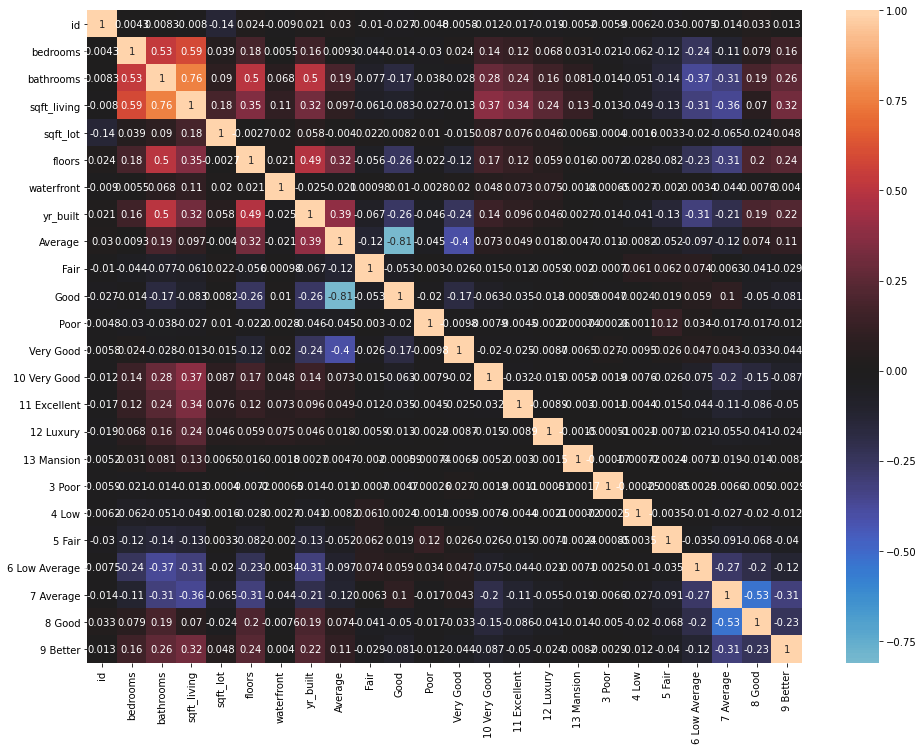

In [61]:
fig, ax = plt.subplots(figsize = (16, 12))
sns.heatmap(X_train.corr(), center=0, annot=True);

## ols Linear Regressions

In [62]:
relevant_columns

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'yr_built']

In [63]:
formula_one = 'price ~ sqft_living'
model_one = ols(formula_one, df).fit()
model_one_summary = model_one.summary()
model_one_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
formula_two = 'price ~ bathrooms'
model_two = ols(formula_two, df).fit()
model_two_summary = model_two.summary()
model_two_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
formula_three = 'price ~ bedrooms'
model_three = ols(formula_three, df).fit()
model_three_summary = model_three.summary()
model_three_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Linear Regressions

In [66]:
model_four = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()
model_four_summary = model_four.summary()
model_four_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
model_five = sm.OLS(y_train, sm.add_constant(X_train['bathrooms'])).fit()
model_five_summary = model_five.summary()
model_five_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     6323.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -2.2782e+05
No. Observations:               16197   AIC:                         4.556e+05
Df Residuals:                   16195   BIC:                         4.557e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6346.9562   7156.513      0.887      0.375   -7680.601    2.04e+04
bathrooms   2.528e+05   3178.595     79.518      0.000    2.47e+05    2.59e+05
==============================================================================
Omnibus:                    12002.593   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           436399.549
Skew:                           3.182   Prob(JB):                         0.00
Kurtosis:                      27.620   Cond. No.                         7.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model_six = sm.OLS(y_train, sm.add_constant(X_train['bedrooms'])).fit()
model_six_summary = model_six.summary()
model_six_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1851.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -2.2961e+05
No. Observations:               16197   AIC:                         4.592e+05
Df Residuals:                   16195   BIC:                         4.592e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.046e+05   1.05e+04      9.949      0.000     8.4e+04    1.25e+05
bedrooms    1.295e+05   3010.210     43.021      0.000    1.24e+05    1.35e+05
==============================================================================
Omnibus:                    13395.379   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           633584.351
Skew:                           3.681   Prob(JB):                         0.00
Kurtosis:                      32.743   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model_seven = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_seven_summary = model_seven.summary()
model_seven_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1567.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -2.2124e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16174   BIC:                         4.427e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.829e+06   1.12e+05     51.837      0.000    5.61e+06    6.05e+06
id            -1.451e-06    5.7e-07     -2.546      0.011   -2.57e-06   -3.34e-07
bedrooms      -2.857e+04   2381.529    -11.997      0.000   -3.32e+04   -2.39e+04
bathrooms      5.847e+04   3846.949     15.199      0.000    5.09e+04     6.6e+04
sqft_living     138.2139      3.809     36.283      0.000     130.747     145.681
sqft_lot         -0.2998      0.041     -7.240      0.000      -0.381      -0.219
floors         2.946e+04   3840.585      7.670      0.000    2.19e+04     3.7e+04
waterfront     7.399e+05      2e+04     37.027      0.000    7.01e+05    7.79e+05
yr_built      -3554.9641     74.133    -47.954      0.000   -3700.272   -3409.656
Average        1.169e+06   2.52e+04     46.432      0.000    1.12e+06    1.22e+06
Fair            1.14e+06   2.85e+04     39.994      0.000    1.08e+06     1.2e+06
Good           1.186e+06   2.44e+04     48.566      0.000    1.14e+06    1.23e+06
Poor           1.105e+06   4.65e+04     23.778      0.000    1.01e+06     1.2e+06
Very Good      1.229e+06   2.39e+04     51.412      0.000    1.18e+06    1.28e+06
10 Very Good   5.303e+05   2.34e+04     22.690      0.000    4.84e+05    5.76e+05
11 Excellent    8.22e+05   2.54e+04     32.397      0.000    7.72e+05    8.72e+05
12 Luxury      1.301e+06    3.3e+04     39.476      0.000    1.24e+06    1.37e+06
13 Mansion     2.687e+06   7.16e+04     37.507      0.000    2.55e+06    2.83e+06
3 Poor        -7.987e+04    1.9e+05     -0.420      0.675   -4.53e+05    2.93e+05
4 Low         -4.546e+04   5.08e+04     -0.895      0.371   -1.45e+05    5.41e+04
5 Fair         -3.93e+04   2.58e+04     -1.523      0.128   -8.99e+04    1.13e+04
6 Low Average  1.061e+04   2.24e+04      0.473      0.636   -3.34e+04    5.46e+04
7 Average      9.816e+04   2.23e+04      4.408      0.000    5.45e+04    1.42e+05
8 Good         1.945e+05   2.24e+04      8.678      0.000    1.51e+05    2.38e+05
9 Better       3.498e+05   2.28e+04     15.344      0.000    3.05e+05    3.95e+05
==============================================================================
Omnibus:                     8209.873   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           174611.982
Skew:                           1.959   Prob(JB):                         0.00
Kurtosis:                      18.601   Cond. No.                     1.81e+25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.45e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
model_eight = sm.OLS(y_train, sm.add_constant(X_train[['sqft_living', 'bathrooms', 'bedrooms']])).fit()
model_eight_summary = model_eight.summary()
model_eight_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     5508.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -2.2479e+05
No. Observations:               16197   AIC:                         4.496e+05
Df Residuals:                   16193   BIC:                         4.496e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.194e+04   8153.936     10.049      0.000     6.6e+04    9.79e+04
sqft_living   308.3478      3.617     85.238      0.000     301.257     315.438
bathrooms    1.106e+04   4098.344      2.698      0.007    3023.334    1.91e+04
bedrooms    -6.125e+04   2811.468    -21.787      0.000   -6.68e+04   -5.57e+04
==============================================================================
Omnibus:                    10136.685   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           263008.779
Skew:                           2.572   Prob(JB):                         0.00
Kurtosis:                      22.059   Cond. No.                     9.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Tune the Models

## Remove Columns with No Value

In [71]:
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Average,Fair,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
6405,3905080280,3,2.50,1880,4499,2.0,0.0,1993,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,5466420030,3,2.50,2020,6564,1.0,0.0,1994,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19076,2623069010,5,4.00,4720,493534,2.0,0.0,1975,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,4443800545,2,2.00,1430,3880,1.0,0.0,1949,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13083,9485930120,3,2.25,2270,32112,1.0,0.0,1980,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
X_train = X_train.drop(['id'], axis=1)

In [73]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Average,Fair,Good,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
6405,3,2.50,1880,4499,2.0,0.0,1993,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,2020,6564,1.0,0.0,1994,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,0.0,1949,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,1980,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
model_nine = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_nine_summary = model_nine.summary()
model_nine_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1641.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -2.2125e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16175   BIC:                         4.427e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.826e+06   1.12e+05     51.805      0.000    5.61e+06    6.05e+06
bedrooms      -2.855e+04   2381.915    -11.985      0.000   -3.32e+04   -2.39e+04
bathrooms       5.85e+04   3847.579     15.205      0.000     5.1e+04     6.6e+04
sqft_living     138.1229      3.810     36.255      0.000     130.655     145.591
sqft_lot         -0.2857      0.041     -6.961      0.000      -0.366      -0.205
floors         2.944e+04   3841.232      7.664      0.000    2.19e+04     3.7e+04
waterfront     7.401e+05      2e+04     37.034      0.000    7.01e+05    7.79e+05
yr_built      -3556.1721     74.144    -47.963      0.000   -3701.502   -3410.842
Average        1.168e+06   2.52e+04     46.400      0.000    1.12e+06    1.22e+06
Fair           1.139e+06   2.85e+04     39.971      0.000    1.08e+06    1.19e+06
Good           1.186e+06   2.44e+04     48.540      0.000    1.14e+06    1.23e+06
Poor           1.104e+06   4.65e+04     23.760      0.000    1.01e+06     1.2e+06
Very Good      1.229e+06   2.39e+04     51.382      0.000    1.18e+06    1.28e+06
10 Very Good   5.295e+05   2.34e+04     22.654      0.000    4.84e+05    5.75e+05
11 Excellent   8.214e+05   2.54e+04     32.371      0.000    7.72e+05    8.71e+05
12 Luxury      1.301e+06    3.3e+04     39.475      0.000    1.24e+06    1.37e+06
13 Mansion     2.687e+06   7.17e+04     37.505      0.000    2.55e+06    2.83e+06
3 Poor        -7.777e+04    1.9e+05     -0.409      0.683   -4.51e+05    2.95e+05
4 Low         -4.569e+04   5.08e+04     -0.899      0.369   -1.45e+05    5.39e+04
5 Fair         -3.92e+04   2.58e+04     -1.519      0.129   -8.98e+04    1.14e+04
6 Low Average  9712.7825   2.24e+04      0.433      0.665   -3.43e+04    5.37e+04
7 Average      9.729e+04   2.23e+04      4.369      0.000    5.36e+04    1.41e+05
8 Good         1.934e+05   2.24e+04      8.629      0.000    1.49e+05    2.37e+05
9 Better       3.488e+05   2.28e+04     15.297      0.000    3.04e+05    3.93e+05
==============================================================================
Omnibus:                     8198.320   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173640.767
Skew:                           1.957   Prob(JB):                         0.00
Kurtosis:                      18.556   Cond. No.                     1.06e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.75e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Remove Columns Which Perfectly Predict Other Columns - Dummy Defaults

In [75]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Average,Fair,Good,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
6405,3,2.50,1880,4499,2.0,0.0,1993,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,2020,6564,1.0,0.0,1994,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,0.0,1949,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,1980,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
X_train = X_train.drop(['Average'], axis=1)

In [77]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Fair,Good,Poor,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,0.0,1949,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,1980,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
model_ten = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_ten_summary = model_ten.summary()
model_ten_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1641.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -2.2125e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16175   BIC:                         4.427e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.897e+06   1.34e+05     51.602      0.000    6.63e+06    7.16e+06
bedrooms      -2.855e+04   2381.915    -11.985      0.000   -3.32e+04   -2.39e+04
bathrooms       5.85e+04   3847.579     15.205      0.000     5.1e+04     6.6e+04
sqft_living     138.1229      3.810     36.255      0.000     130.655     145.591
sqft_lot         -0.2857      0.041     -6.961      0.000      -0.366      -0.205
floors         2.944e+04   3841.232      7.664      0.000    2.19e+04     3.7e+04
waterfront     7.401e+05      2e+04     37.034      0.000    7.01e+05    7.79e+05
yr_built      -3556.1721     74.144    -47.963      0.000   -3701.502   -3410.842
Fair          -2.902e+04   1.86e+04     -1.563      0.118   -6.54e+04    7365.552
Good           1.774e+04   4056.598      4.374      0.000    9792.382    2.57e+04
Poor          -6.362e+04   4.93e+04     -1.290      0.197    -1.6e+05     3.3e+04
Very Good      6.057e+04   6502.146      9.316      0.000    4.78e+04    7.33e+04
10 Very Good   6.268e+05   2.41e+04     25.980      0.000     5.8e+05    6.74e+05
11 Excellent   9.188e+05   2.61e+04     35.225      0.000    8.68e+05     9.7e+05
12 Luxury      1.399e+06   3.35e+04     41.708      0.000    1.33e+06    1.46e+06
13 Mansion     2.785e+06    7.2e+04     38.697      0.000    2.64e+06    2.93e+06
3 Poor         1.957e+04   1.91e+05      0.103      0.918   -3.54e+05    3.93e+05
4 Low          5.165e+04   5.11e+04      1.010      0.312   -4.86e+04    1.52e+05
5 Fair         5.814e+04   2.64e+04      2.204      0.028    6439.268     1.1e+05
6 Low Average  1.071e+05   2.31e+04      4.641      0.000    6.18e+04    1.52e+05
7 Average      1.946e+05    2.3e+04      8.471      0.000     1.5e+05     2.4e+05
8 Good         2.908e+05   2.32e+04     12.552      0.000    2.45e+05    3.36e+05
9 Better       4.461e+05   2.36e+04     18.925      0.000       4e+05    4.92e+05
==============================================================================
Omnibus:                     8198.320   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173640.767
Skew:                           1.957   Prob(JB):                         0.00
Kurtosis:                      18.556   Cond. No.                     9.50e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.39e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
X_train = X_train.drop(['7 Average'], axis=1)

In [80]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Fair,Good,Poor,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,8 Good,9 Better
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,0.0,1949,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,1980,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
model_eleven = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_eleven_summary = model_eleven.summary()
model_eleven_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1641.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:            -2.2125e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16175   BIC:                         4.427e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.091e+06   1.44e+05     49.081      0.000    6.81e+06    7.37e+06
bedrooms      -2.855e+04   2381.915    -11.985      0.000   -3.32e+04   -2.39e+04
bathrooms       5.85e+04   3847.579     15.205      0.000     5.1e+04     6.6e+04
sqft_living     138.1229      3.810     36.255      0.000     130.655     145.591
sqft_lot         -0.2857      0.041     -6.961      0.000      -0.366      -0.205
floors         2.944e+04   3841.232      7.664      0.000    2.19e+04     3.7e+04
waterfront     7.401e+05      2e+04     37.034      0.000    7.01e+05    7.79e+05
yr_built      -3556.1721     74.144    -47.963      0.000   -3701.502   -3410.842
Fair          -2.902e+04   1.86e+04     -1.563      0.118   -6.54e+04    7365.552
Good           1.774e+04   4056.598      4.374      0.000    9792.382    2.57e+04
Poor          -6.362e+04   4.93e+04     -1.290      0.197    -1.6e+05     3.3e+04
Very Good      6.057e+04   6502.146      9.316      0.000    4.78e+04    7.33e+04
10 Very Good   4.322e+05   9582.948     45.102      0.000    4.13e+05    4.51e+05
11 Excellent   7.241e+05   1.49e+04     48.694      0.000    6.95e+05    7.53e+05
12 Luxury      1.204e+06   2.78e+04     43.379      0.000    1.15e+06    1.26e+06
13 Mansion      2.59e+06   7.54e+04     34.344      0.000    2.44e+06    2.74e+06
3 Poor        -1.751e+05   2.07e+05     -0.844      0.399   -5.81e+05    2.31e+05
4 Low          -1.43e+05   5.06e+04     -2.828      0.005   -2.42e+05   -4.39e+04
5 Fair        -1.365e+05   1.57e+04     -8.690      0.000   -1.67e+05   -1.06e+05
6 Low Average -8.758e+04   6279.035    -13.948      0.000   -9.99e+04   -7.53e+04
8 Good         9.615e+04   4457.111     21.572      0.000    8.74e+04    1.05e+05
9 Better       2.515e+05   6702.293     37.520      0.000    2.38e+05    2.65e+05
==============================================================================
Omnibus:                     8198.320   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173640.767
Skew:                           1.957   Prob(JB):                         0.00
Kurtosis:                      18.556   Cond. No.                     5.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Remove Columns Which are Not Statistically Significant

In [82]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Fair,Good,Poor,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,8 Good,9 Better
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,0.0,1949,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,1980,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
X_train = X_train.drop(['Fair'], axis=1)

In [84]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Good,Poor,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,8 Good,9 Better
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,0.0,1949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,1980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [85]:
model_twelve = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twelve_summary = model_twelve.summary()
model_twelve_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1723.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:34   Log-Likelihood:            -2.2125e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16176   BIC:                         4.427e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.081e+06   1.44e+05     49.059      0.000     6.8e+06    7.36e+06
bedrooms      -2.857e+04   2381.955    -11.996      0.000   -3.32e+04   -2.39e+04
bathrooms      5.857e+04   3847.488     15.224      0.000     5.1e+04    6.61e+04
sqft_living     138.1385      3.810     36.257      0.000     130.671     145.606
sqft_lot         -0.2876      0.041     -7.009      0.000      -0.368      -0.207
floors         2.957e+04   3840.566      7.698      0.000     2.2e+04    3.71e+04
waterfront       7.4e+05      2e+04     37.025      0.000    7.01e+05    7.79e+05
yr_built      -3551.3614     74.083    -47.938      0.000   -3696.572   -3406.150
Good           1.831e+04   4040.458      4.532      0.000    1.04e+04    2.62e+04
Poor          -6.221e+04   4.93e+04     -1.262      0.207   -1.59e+05    3.44e+04
Very Good      6.119e+04   6490.314      9.428      0.000    4.85e+04    7.39e+04
10 Very Good   4.323e+05   9583.324     45.106      0.000    4.13e+05    4.51e+05
11 Excellent   7.242e+05   1.49e+04     48.698      0.000    6.95e+05    7.53e+05
12 Luxury      1.204e+06   2.78e+04     43.378      0.000    1.15e+06    1.26e+06
13 Mansion      2.59e+06   7.54e+04     34.342      0.000    2.44e+06    2.74e+06
3 Poor        -1.749e+05   2.07e+05     -0.844      0.399   -5.81e+05    2.32e+05
4 Low         -1.476e+05   5.05e+04     -2.923      0.003   -2.47e+05   -4.86e+04
5 Fair        -1.378e+05   1.57e+04     -8.788      0.000   -1.69e+05   -1.07e+05
6 Low Average -8.803e+04   6272.557    -14.035      0.000      -1e+05   -7.57e+04
8 Good         9.624e+04   4456.887     21.594      0.000    8.75e+04    1.05e+05
9 Better       2.516e+05   6702.282     37.535      0.000    2.38e+05    2.65e+05
==============================================================================
Omnibus:                     8194.650   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173418.967
Skew:                           1.956   Prob(JB):                         0.00
Kurtosis:                      18.545   Cond. No.                     5.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
X_train = X_train.drop(['Poor'], axis=1)

In [87]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,8 Good,9 Better
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,0.0,1949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,1980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [88]:
model_thirteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_thirteen_summary = model_thirteen.summary()
model_thirteen_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:34   Log-Likelihood:            -2.2125e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16177   BIC:                         4.427e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.076e+06   1.44e+05     49.042      0.000    6.79e+06    7.36e+06
bedrooms      -2.855e+04   2381.914    -11.986      0.000   -3.32e+04   -2.39e+04
bathrooms      5.859e+04   3847.541     15.228      0.000     5.1e+04    6.61e+04
sqft_living     138.0849      3.810     36.245      0.000     130.617     145.553
sqft_lot         -0.2881      0.041     -7.023      0.000      -0.369      -0.208
floors         2.956e+04   3840.636      7.698      0.000     2.2e+04    3.71e+04
waterfront     7.401e+05      2e+04     37.029      0.000    7.01e+05    7.79e+05
yr_built      -3548.5917     74.052    -47.920      0.000   -3693.742   -3403.442
Good            1.85e+04   4037.776      4.582      0.000    1.06e+04    2.64e+04
Very Good      6.143e+04   6487.739      9.468      0.000    4.87e+04    7.41e+04
10 Very Good   4.323e+05   9583.321     45.113      0.000    4.14e+05    4.51e+05
11 Excellent   7.243e+05   1.49e+04     48.705      0.000    6.95e+05    7.53e+05
12 Luxury      1.204e+06   2.78e+04     43.383      0.000    1.15e+06    1.26e+06
13 Mansion      2.59e+06   7.54e+04     34.345      0.000    2.44e+06    2.74e+06
3 Poor        -1.749e+05   2.07e+05     -0.844      0.399   -5.81e+05    2.32e+05
4 Low         -1.474e+05   5.05e+04     -2.920      0.004   -2.46e+05   -4.85e+04
5 Fair        -1.401e+05   1.56e+04     -8.987      0.000   -1.71e+05    -1.1e+05
6 Low Average -8.825e+04   6270.273    -14.075      0.000   -1.01e+05    -7.6e+04
8 Good         9.625e+04   4456.966     21.596      0.000    8.75e+04    1.05e+05
9 Better       2.516e+05   6702.319     37.541      0.000    2.38e+05    2.65e+05
==============================================================================
Omnibus:                     8193.579   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173360.624
Skew:                           1.956   Prob(JB):                         0.00
Kurtosis:                      18.543   Cond. No.                     5.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
X_train = X_train.drop(['3 Poor'], axis=1)

In [90]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,8 Good,9 Better
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,0.0,1949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,1980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
model_fourteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_fourteen_summary = model_fourteen.summary()
model_fourteen_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1914.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:34   Log-Likelihood:            -2.2125e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16178   BIC:                         4.427e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.075e+06   1.44e+05     49.037      0.000    6.79e+06    7.36e+06
bedrooms      -2.852e+04   2381.633    -11.975      0.000   -3.32e+04   -2.39e+04
bathrooms       5.86e+04   3847.493     15.230      0.000    5.11e+04    6.61e+04
sqft_living     138.0988      3.810     36.249      0.000     130.631     145.566
sqft_lot         -0.2882      0.041     -7.025      0.000      -0.369      -0.208
floors         2.956e+04   3840.599      7.697      0.000     2.2e+04    3.71e+04
waterfront     7.401e+05      2e+04     37.031      0.000    7.01e+05    7.79e+05
yr_built      -3548.1900     74.050    -47.916      0.000   -3693.336   -3403.044
Good           1.851e+04   4037.736      4.583      0.000    1.06e+04    2.64e+04
Very Good      6.129e+04   6485.753      9.451      0.000    4.86e+04     7.4e+04
10 Very Good   4.323e+05   9583.111     45.110      0.000    4.14e+05    4.51e+05
11 Excellent   7.242e+05   1.49e+04     48.701      0.000    6.95e+05    7.53e+05
12 Luxury      1.204e+06   2.78e+04     43.380      0.000    1.15e+06    1.26e+06
13 Mansion      2.59e+06   7.54e+04     34.344      0.000    2.44e+06    2.74e+06
4 Low         -1.473e+05   5.05e+04     -2.919      0.004   -2.46e+05   -4.84e+04
5 Fair          -1.4e+05   1.56e+04     -8.982      0.000   -1.71e+05   -1.09e+05
6 Low Average -8.819e+04   6269.728    -14.066      0.000      -1e+05   -7.59e+04
8 Good         9.625e+04   4456.926     21.596      0.000    8.75e+04    1.05e+05
9 Better       2.516e+05   6702.189     37.538      0.000    2.38e+05    2.65e+05
==============================================================================
Omnibus:                     8192.768   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173302.069
Skew:                           1.955   Prob(JB):                         0.00
Kurtosis:                      18.540   Cond. No.                     3.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Troubleshoot Unusual Coefficients

## Isolate Square Footage Living Area from Multicollinearity

In [92]:
# X_train.head()

In [93]:
# X_train = X_train.drop(['sqft_living'], axis=1)

In [94]:
# X_train.head()

In [95]:
# model_fifteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_fifteen_summary = model_fifteen.summary()
# model_fifteen_summary

In [96]:
# X_train = X_train.drop(['yr_built'], axis=1)

In [97]:
# X_train.head()

In [98]:
# model_sixteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_sixteen_summary = model_sixteen.summary()
# model_sixteen_summary

In [99]:
# X_train.head()

In [100]:
# X_train = X_train.drop(['bathrooms'], axis=1)

In [101]:
# X_train.head()

In [102]:
# model_seventeen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_seventeen_summary = model_seventeen.summary()
# model_seventeen_summary

In [103]:
# X_train = X_train.drop(['bedrooms'], axis=1)

In [104]:
# X_train.head()

In [105]:
# model_eighteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_eighteen_summary = model_eighteen.summary()
# model_eighteen_summary

In [106]:
# X_train = X_train.drop(['yr_built'], axis=1)

In [107]:
# X_train.head()

In [108]:
# model_nineteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_nineteen_summary = model_nineteen.summary()
# model_nineteen_summary

In [109]:
# X_train = X_train.drop(['floors'], axis=1)

In [110]:
# X_train.head()

In [111]:
# model_twenty = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_twenty_summary = model_twenty.summary()
# model_twenty_summary

In [112]:
# X_train = X_train.drop(['sqft_lot'], axis=1)

In [113]:
# X_train.head()

In [114]:
# model_twenty_one = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_twenty_one_summary = model_twenty_one.summary()
# model_twenty_one_summary

In [115]:
# X_train = X_train.drop(['4 Low'], axis=1)

In [116]:
# X_train.head()

In [117]:
# model_twenty_two = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_twenty_two_summary = model_twenty_two.summary()
# model_twenty_two_summary

In [118]:
# X_train.corr()

## Binning

In [119]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,8 Good,9 Better
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,0.0,1949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,1980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


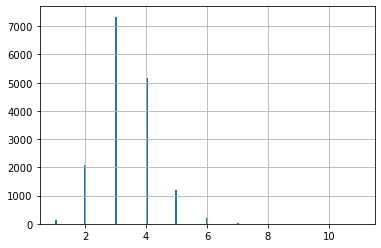

In [120]:
X_train['bedrooms'].hist(bins="auto");

In [121]:
X_train['bedrooms'].value_counts()

3     7339
4     5184
2     2074
5     1199
6      199
1      152
7       33
8       10
9        4
10       2
11       1
Name: bedrooms, dtype: int64

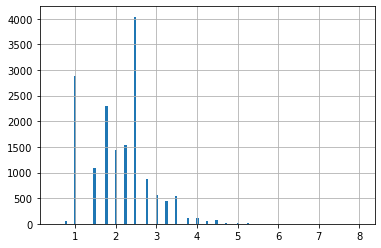

In [122]:
X_train['bathrooms'].hist(bins="auto");

In [123]:
X_train['bathrooms'].value_counts()

2.50    4038
1.00    2878
1.75    2296
2.25    1528
2.00    1433
1.50    1097
2.75     879
3.00     571
3.50     550
3.25     441
4.00     111
3.75     109
4.50      80
4.25      64
0.75      53
4.75      19
5.00      14
5.25      10
1.25       5
5.50       5
0.50       4
6.00       3
5.75       3
6.50       2
8.00       2
6.75       2
Name: bathrooms, dtype: int64

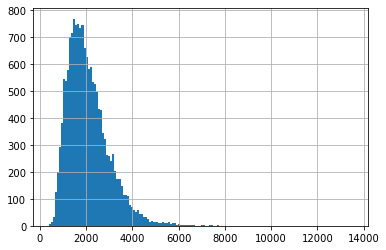

In [124]:
X_train['sqft_living'].hist(bins="auto");

In [125]:
X_train['sqft_living'].value_counts()

1800    104
1300    103
1010    101
1540    100
1480     99
       ... 
4870      1
2885      1
5030      1
5070      1
1867      1
Name: sqft_living, Length: 896, dtype: int64

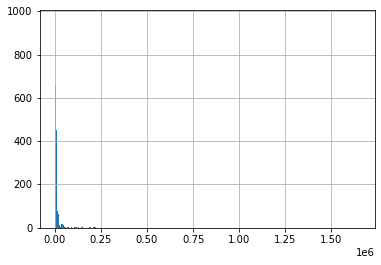

In [126]:
X_train['sqft_lot'].hist(bins="auto");

In [127]:
X_train['sqft_lot'].value_counts()

5000     264
6000     209
4000     189
7200     167
7500      96
        ... 
7847       1
5806       1
9904       1
18815      1
43017      1
Name: sqft_lot, Length: 8015, dtype: int64

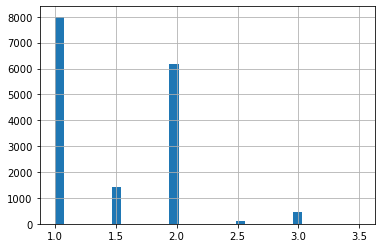

In [128]:
X_train['floors'].hist(bins="auto");

In [129]:
X_train['floors'].value_counts()

1.0    8002
2.0    6185
1.5    1425
3.0     463
2.5     115
3.5       7
Name: floors, dtype: int64

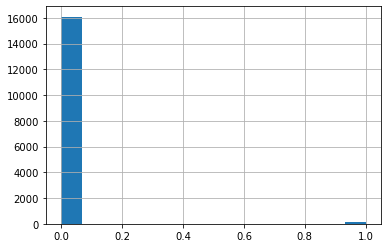

In [130]:
X_train['waterfront'].hist(bins="auto");

In [131]:
X_train['yr_built'].value_counts()

2014    417
2006    345
2005    342
1977    327
2004    324
       ... 
2015     26
1901     24
1902     19
1934     16
1935     16
Name: yr_built, Length: 116, dtype: int64

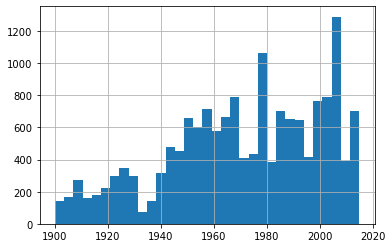

In [132]:
X_train['yr_built'].hist(bins="auto");

In [133]:
X_train['old'] = X_train['yr_built'] < 1930

In [134]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,8 Good,9 Better,old
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
15201,2,2.00,1430,3880,1.0,0.0,1949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
13083,3,2.25,2270,32112,1.0,0.0,1980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False


In [135]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     16197 non-null  float64
 6   yr_built       16197 non-null  int64  
 7   Good           16197 non-null  float64
 8   Very Good      16197 non-null  float64
 9   10 Very Good   16197 non-null  float64
 10  11 Excellent   16197 non-null  float64
 11  12 Luxury      16197 non-null  float64
 12  13 Mansion     16197 non-null  float64
 13  4 Low          16197 non-null  float64
 14  5 Fair         16197 non-null  float64
 15  6 Low Average  16197 non-null  float64
 16  8 Good         16197 non-null  float64
 17  9 Better       16197 non-null  float64
 18  old

In [136]:
old_train = X_train[['old']]
encoder_old = OrdinalEncoder()
encoder_old.fit(old_train)
encoder_old.categories_[0]
old_encoded_train = encoder_old.transform(old_train)
old_encoded_train = old_encoded_train.flatten()
old_encoded_train
X_train['old'] = old_encoded_train
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     16197 non-null  float64
 6   yr_built       16197 non-null  int64  
 7   Good           16197 non-null  float64
 8   Very Good      16197 non-null  float64
 9   10 Very Good   16197 non-null  float64
 10  11 Excellent   16197 non-null  float64
 11  12 Luxury      16197 non-null  float64
 12  13 Mansion     16197 non-null  float64
 13  4 Low          16197 non-null  float64
 14  5 Fair         16197 non-null  float64
 15  6 Low Average  16197 non-null  float64
 16  8 Good         16197 non-null  float64
 17  9 Better       16197 non-null  float64
 18  old

In [137]:
model_twenty_three = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twenty_three_summary = model_twenty_three.summary()
model_twenty_three_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:42   Log-Likelihood:            -2.2125e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16177   BIC:                         4.427e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.262e+06   2.14e+05     33.959      0.000    6.84e+06    7.68e+06
bedrooms      -2.872e+04   2387.599    -12.029      0.000   -3.34e+04    -2.4e+04
bathrooms      5.912e+04   3872.723     15.266      0.000    5.15e+04    6.67e+04
sqft_living     137.9744      3.811     36.203      0.000     130.504     145.445
sqft_lot         -0.2890      0.041     -7.044      0.000      -0.369      -0.209
floors         3.133e+04   4118.847      7.606      0.000    2.33e+04    3.94e+04
waterfront      7.39e+05      2e+04     36.932      0.000       7e+05    7.78e+05
yr_built      -3644.0213    109.568    -33.258      0.000   -3858.788   -3429.255
Good           1.807e+04   4054.014      4.458      0.000    1.01e+04     2.6e+04
Very Good      6.093e+04   6493.121      9.383      0.000    4.82e+04    7.37e+04
10 Very Good   4.324e+05   9583.412     45.120      0.000    4.14e+05    4.51e+05
11 Excellent   7.244e+05   1.49e+04     48.712      0.000    6.95e+05    7.54e+05
12 Luxury      1.204e+06   2.78e+04     43.389      0.000    1.15e+06    1.26e+06
13 Mansion     2.591e+06   7.54e+04     34.348      0.000    2.44e+06    2.74e+06
4 Low         -1.478e+05   5.05e+04     -2.928      0.003   -2.47e+05   -4.88e+04
5 Fair        -1.404e+05   1.56e+04     -9.006      0.000   -1.71e+05    -1.1e+05
6 Low Average -8.846e+04   6274.003    -14.100      0.000   -1.01e+05   -7.62e+04
8 Good         9.632e+04   4457.273     21.610      0.000    8.76e+04    1.05e+05
9 Better       2.519e+05   6708.211     37.555      0.000    2.39e+05    2.65e+05
old           -9209.4749   7761.014     -1.187      0.235   -2.44e+04    6002.972
==============================================================================
Omnibus:                     8186.881   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173237.653
Skew:                           1.953   Prob(JB):                         0.00
Kurtosis:                      18.538   Cond. No.                     5.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
X_train['middle'] = (X_train['yr_built'] > 1930) & (X_train['yr_built'] < 1970)

In [139]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,8 Good,9 Better,old,middle
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
15201,2,2.00,1430,3880,1.0,0.0,1949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
13083,3,2.25,2270,32112,1.0,0.0,1980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False


In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     16197 non-null  float64
 6   yr_built       16197 non-null  int64  
 7   Good           16197 non-null  float64
 8   Very Good      16197 non-null  float64
 9   10 Very Good   16197 non-null  float64
 10  11 Excellent   16197 non-null  float64
 11  12 Luxury      16197 non-null  float64
 12  13 Mansion     16197 non-null  float64
 13  4 Low          16197 non-null  float64
 14  5 Fair         16197 non-null  float64
 15  6 Low Average  16197 non-null  float64
 16  8 Good         16197 non-null  float64
 17  9 Better       16197 non-null  float64
 18  old

In [141]:
middle_train = X_train[['middle']]
encoder_middle = OrdinalEncoder()
encoder_middle.fit(middle_train)
encoder_middle.categories_[0]
middle_encoded_train = encoder_middle.transform(middle_train)
middle_encoded_train = middle_encoded_train.flatten()
middle_encoded_train
X_train['middle'] = middle_encoded_train
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     16197 non-null  float64
 6   yr_built       16197 non-null  int64  
 7   Good           16197 non-null  float64
 8   Very Good      16197 non-null  float64
 9   10 Very Good   16197 non-null  float64
 10  11 Excellent   16197 non-null  float64
 11  12 Luxury      16197 non-null  float64
 12  13 Mansion     16197 non-null  float64
 13  4 Low          16197 non-null  float64
 14  5 Fair         16197 non-null  float64
 15  6 Low Average  16197 non-null  float64
 16  8 Good         16197 non-null  float64
 17  9 Better       16197 non-null  float64
 18  old

In [142]:
model_twenty_four = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twenty_four_summary = model_twenty_four.summary()
model_twenty_four_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1735.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:42   Log-Likelihood:            -2.2121e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16176   BIC:                         4.426e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.387e+06      3e+05     17.933      0.000     4.8e+06    5.98e+06
bedrooms          -3e+04   2386.225    -12.570      0.000   -3.47e+04   -2.53e+04
bathrooms      6.163e+04   3873.767     15.908      0.000     5.4e+04    6.92e+04
sqft_living     137.4579      3.802     36.150      0.000     130.005     144.911
sqft_lot         -0.2659      0.041     -6.482      0.000      -0.346      -0.185
floors         3.203e+04   4109.765      7.794      0.000     2.4e+04    4.01e+04
waterfront     7.367e+05      2e+04     36.904      0.000    6.98e+05    7.76e+05
yr_built      -2708.5790    151.902    -17.831      0.000   -3006.324   -2410.835
Good           1.919e+04   4046.287      4.743      0.000    1.13e+04    2.71e+04
Very Good      5.933e+04   6480.077      9.156      0.000    4.66e+04     7.2e+04
10 Very Good   4.357e+05   9567.814     45.540      0.000    4.17e+05    4.54e+05
11 Excellent   7.279e+05   1.48e+04     49.047      0.000    6.99e+05    7.57e+05
12 Luxury      1.207e+06   2.77e+04     43.584      0.000    1.15e+06    1.26e+06
13 Mansion     2.594e+06   7.52e+04     34.471      0.000    2.45e+06    2.74e+06
4 Low         -1.478e+05   5.04e+04     -2.934      0.003   -2.46e+05   -4.91e+04
5 Fair        -1.366e+05   1.56e+04     -8.782      0.000   -1.67e+05   -1.06e+05
6 Low Average -8.846e+04   6259.000    -14.134      0.000   -1.01e+05   -7.62e+04
8 Good         9.825e+04   4451.941     22.069      0.000    8.95e+04    1.07e+05
9 Better       2.538e+05   6695.466     37.905      0.000    2.41e+05    2.67e+05
old            7.172e+04    1.2e+04      5.993      0.000    4.83e+04    9.52e+04
middle         5.641e+04   6360.651      8.868      0.000    4.39e+04    6.89e+04
==============================================================================
Omnibus:                     8149.934   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172409.549
Skew:                           1.941   Prob(JB):                         0.00
Kurtosis:                      18.505   Cond. No.                     8.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
X_train['newish'] = (X_train['yr_built'] > 1970) & (X_train['yr_built'] < 1990)

In [144]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Good,Very Good,10 Very Good,...,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,8 Good,9 Better,old,middle,newish
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,False
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
15201,2,2.00,1430,3880,1.0,0.0,1949,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
13083,3,2.25,2270,32112,1.0,0.0,1980,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,True


In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     16197 non-null  float64
 6   yr_built       16197 non-null  int64  
 7   Good           16197 non-null  float64
 8   Very Good      16197 non-null  float64
 9   10 Very Good   16197 non-null  float64
 10  11 Excellent   16197 non-null  float64
 11  12 Luxury      16197 non-null  float64
 12  13 Mansion     16197 non-null  float64
 13  4 Low          16197 non-null  float64
 14  5 Fair         16197 non-null  float64
 15  6 Low Average  16197 non-null  float64
 16  8 Good         16197 non-null  float64
 17  9 Better       16197 non-null  float64
 18  old

In [146]:
newish_train = X_train[['newish']]
encoder_newish = OrdinalEncoder()
encoder_newish.fit(newish_train)
encoder_newish.categories_[0]
newish_encoded_train = encoder_newish.transform(newish_train)
newish_encoded_train = newish_encoded_train.flatten()
newish_encoded_train
X_train['newish'] = newish_encoded_train
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     16197 non-null  float64
 6   yr_built       16197 non-null  int64  
 7   Good           16197 non-null  float64
 8   Very Good      16197 non-null  float64
 9   10 Very Good   16197 non-null  float64
 10  11 Excellent   16197 non-null  float64
 11  12 Luxury      16197 non-null  float64
 12  13 Mansion     16197 non-null  float64
 13  4 Low          16197 non-null  float64
 14  5 Fair         16197 non-null  float64
 15  6 Low Average  16197 non-null  float64
 16  8 Good         16197 non-null  float64
 17  9 Better       16197 non-null  float64
 18  old

In [147]:
model_twenty_five = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twenty_five_summary = model_twenty_five.summary()
model_twenty_five_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1652.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:42   Log-Likelihood:            -2.2121e+05
No. Observations:               16197   AIC:                         4.425e+05
Df Residuals:                   16175   BIC:                         4.426e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.443e+06   3.53e+05     15.408      0.000    4.75e+06    6.14e+06
bedrooms      -2.995e+04   2390.637    -12.529      0.000   -3.46e+04   -2.53e+04
bathrooms      6.159e+04   3875.811     15.891      0.000     5.4e+04    6.92e+04
sqft_living     137.4538      3.803     36.148      0.000     130.000     144.907
sqft_lot         -0.2658      0.041     -6.480      0.000      -0.346      -0.185
floors         3.167e+04   4278.451      7.402      0.000    2.33e+04    4.01e+04
waterfront     7.368e+05      2e+04     36.904      0.000    6.98e+05    7.76e+05
yr_built      -2736.1914    177.177    -15.443      0.000   -3083.478   -2388.904
Good           1.938e+04   4093.940      4.734      0.000    1.14e+04    2.74e+04
Very Good      5.945e+04   6492.366      9.158      0.000    4.67e+04    7.22e+04
10 Very Good   4.357e+05   9568.452     45.534      0.000    4.17e+05    4.54e+05
11 Excellent   7.278e+05   1.48e+04     49.033      0.000    6.99e+05    7.57e+05
12 Luxury      1.207e+06   2.77e+04     43.547      0.000    1.15e+06    1.26e+06
13 Mansion     2.594e+06   7.52e+04     34.471      0.000    2.45e+06    2.74e+06
4 Low          -1.48e+05   5.04e+04     -2.939      0.003   -2.47e+05   -4.93e+04
5 Fair         -1.37e+05   1.56e+04     -8.779      0.000   -1.68e+05   -1.06e+05
6 Low Average -8.864e+04   6287.877    -14.098      0.000   -1.01e+05   -7.63e+04
8 Good          9.83e+04   4454.885     22.066      0.000    8.96e+04    1.07e+05
9 Better       2.538e+05   6696.255     37.896      0.000    2.41e+05    2.67e+05
old            6.875e+04   1.55e+04      4.443      0.000    3.84e+04    9.91e+04
middle         5.437e+04   9270.045      5.865      0.000    3.62e+04    7.25e+04
newish        -1874.6916   6191.443     -0.303      0.762    -1.4e+04    1.03e+04
==============================================================================
Omnibus:                     8150.257   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172394.435
Skew:                           1.941   Prob(JB):                         0.00
Kurtosis:                      18.504   Cond. No.                     9.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
X_train['new'] = X_train['yr_built'] > 1990

In [149]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,Good,Very Good,10 Very Good,...,13 Mansion,4 Low,5 Fair,6 Low Average,8 Good,9 Better,old,middle,newish,new
6405,3,2.50,1880,4499,2.0,0.0,1993,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True
937,3,2.50,2020,6564,1.0,0.0,1994,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
19076,5,4.00,4720,493534,2.0,0.0,1975,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
15201,2,2.00,1430,3880,1.0,0.0,1949,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
13083,3,2.25,2270,32112,1.0,0.0,1980,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False


In [150]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     16197 non-null  float64
 6   yr_built       16197 non-null  int64  
 7   Good           16197 non-null  float64
 8   Very Good      16197 non-null  float64
 9   10 Very Good   16197 non-null  float64
 10  11 Excellent   16197 non-null  float64
 11  12 Luxury      16197 non-null  float64
 12  13 Mansion     16197 non-null  float64
 13  4 Low          16197 non-null  float64
 14  5 Fair         16197 non-null  float64
 15  6 Low Average  16197 non-null  float64
 16  8 Good         16197 non-null  float64
 17  9 Better       16197 non-null  float64
 18  old

In [151]:
new_train = X_train[['new']]
encoder_new = OrdinalEncoder()
encoder_new.fit(new_train)
encoder_new.categories_[0]
new_encoded_train = encoder_new.transform(new_train)
new_encoded_train = new_encoded_train.flatten()
new_encoded_train
X_train['new'] = new_encoded_train
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     16197 non-null  float64
 6   yr_built       16197 non-null  int64  
 7   Good           16197 non-null  float64
 8   Very Good      16197 non-null  float64
 9   10 Very Good   16197 non-null  float64
 10  11 Excellent   16197 non-null  float64
 11  12 Luxury      16197 non-null  float64
 12  13 Mansion     16197 non-null  float64
 13  4 Low          16197 non-null  float64
 14  5 Fair         16197 non-null  float64
 15  6 Low Average  16197 non-null  float64
 16  8 Good         16197 non-null  float64
 17  9 Better       16197 non-null  float64
 18  old

In [152]:
model_twenty_six = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twenty_six_summary = model_twenty_six.summary()
model_twenty_six_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1583.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:42   Log-Likelihood:            -2.2119e+05
No. Observations:               16197   AIC:                         4.424e+05
Df Residuals:                   16174   BIC:                         4.426e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.548e+06   3.91e+05     16.732      0.000    5.78e+06    7.31e+06
bedrooms      -2.905e+04   2391.578    -12.146      0.000   -3.37e+04   -2.44e+04
bathrooms      6.065e+04   3873.504     15.658      0.000    5.31e+04    6.82e+04
sqft_living     137.0395      3.798     36.080      0.000     129.595     144.484
sqft_lot         -0.2699      0.041     -6.588      0.000      -0.350      -0.190
floors         2.887e+04   4294.479      6.722      0.000    2.05e+04    3.73e+04
waterfront     7.382e+05   1.99e+04     37.019      0.000    6.99e+05    7.77e+05
yr_built      -3322.3182    198.444    -16.742      0.000   -3711.290   -2933.346
Good           2.174e+04   4104.652      5.297      0.000    1.37e+04    2.98e+04
Very Good      6.057e+04   6486.306      9.339      0.000    4.79e+04    7.33e+04
10 Very Good   4.367e+05   9557.407     45.692      0.000    4.18e+05    4.55e+05
11 Excellent   7.312e+05   1.48e+04     49.294      0.000    7.02e+05     7.6e+05
12 Luxury      1.212e+06   2.77e+04     43.780      0.000    1.16e+06    1.27e+06
13 Mansion     2.595e+06   7.51e+04     34.530      0.000    2.45e+06    2.74e+06
4 Low         -1.527e+05   5.03e+04     -3.036      0.002   -2.51e+05   -5.41e+04
5 Fair        -1.406e+05   1.56e+04     -9.014      0.000   -1.71e+05    -1.1e+05
6 Low Average -9.074e+04   6288.005    -14.430      0.000   -1.03e+05   -7.84e+04
8 Good          9.85e+04   4449.275     22.138      0.000    8.98e+04    1.07e+05
9 Better       2.551e+05   6690.811     38.127      0.000    2.42e+05    2.68e+05
old            9.046e+04   1.58e+04      5.723      0.000    5.95e+04    1.21e+05
middle         9.737e+04   1.14e+04      8.568      0.000    7.51e+04     1.2e+05
newish         5.701e+04   1.09e+04      5.211      0.000    3.56e+04    7.85e+04
new            7.948e+04   1.22e+04      6.525      0.000    5.56e+04    1.03e+05
==============================================================================
Omnibus:                     8169.348   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172946.711
Skew:                           1.947   Prob(JB):                         0.00
Kurtosis:                      18.527   Cond. No.                     1.05e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Polynomial Features

In [153]:
pf = PolynomialFeatures()
pf.fit(X_train)

PolynomialFeatures()

In [154]:
X_train_pdf = pd.DataFrame(pf.transform(X_train), columns=pf.get_feature_names())
X_train_pdf

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x18^2,x18 x19,x18 x20,x18 x21,x19^2,x19 x20,x19 x21,x20^2,x20 x21,x21^2
0,1.0,3.0,2.50,1880.0,4499.0,2.0,0.0,1993.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,3.0,2.50,2020.0,6564.0,1.0,0.0,1994.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,5.0,4.00,4720.0,493534.0,2.0,0.0,1975.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,2.0,2.00,1430.0,3880.0,1.0,0.0,1949.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,2.25,2270.0,32112.0,1.0,0.0,1980.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,1.0,3.0,2.50,2230.0,5800.0,2.0,0.0,2004.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16193,1.0,4.0,2.75,2770.0,3852.0,2.0,0.0,2014.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16194,1.0,4.0,1.50,1530.0,9000.0,1.0,0.0,1976.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16195,1.0,1.0,0.75,380.0,15000.0,1.0,0.0,1963.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [155]:
X_train_pdf.shape

(16197, 276)

In [156]:
lr = LinearRegression()

lr.fit(X_train_pdf, y_train)

LinearRegression()

In [157]:
lr.score(X_train_pdf, y_train)

0.7530127971629685

In [158]:
y_train.head()

6405     529000.0
937      253000.0
19076    745000.0
15201    545000.0
13083    390000.0
Name: price, dtype: float64

In [159]:
y_train_pdf = y_train.reset_index(drop = True)
y_train_pdf

0        529000.0
1        253000.0
2        745000.0
3        545000.0
4        390000.0
           ...   
16192    440000.0
16193    572000.0
16194    299800.0
16195    245000.0
16196    545000.0
Name: price, Length: 16197, dtype: float64

In [160]:
model_twenty_seven = sm.OLS(y_train_pdf, sm.add_constant(X_train_pdf)).fit()
model_twenty_seven_summary = model_twenty_seven.summary()
model_twenty_seven_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     258.1
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:43   Log-Likelihood:            -2.1917e+05
No. Observations:               16197   AIC:                         4.387e+05
Df Residuals:                   16007   BIC:                         4.402e+05
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1           3.025e+05   3.92e+04      7.718      0.000    2.26e+05    3.79e+05
x0           -1.3e+06   5.06e+05     -2.570      0.010   -2.29e+06   -3.09e+05
x1         -2.714e+05   8.11e+05     -0.335      0.738   -1.86e+06    1.32e+06
x2          2888.5144    851.276      3.393      0.001    1219.918    4557.111
x3           -18.4987      9.993     -1.851      0.064     -38.085       1.088
x4         -2.694e+06   1.05e+06     -2.564      0.010   -4.75e+06   -6.34e+05
x5         -8.294e+06   2.14e+06     -3.874      0.000   -1.25e+07    -4.1e+06
x6          6818.6510   1112.006      6.132      0.000    4638.995    8998.307
x7         -1.572e+05   4.28e+05     -0.367      0.714   -9.97e+05    6.82e+05
x8         -1.607e+06    6.6e+05     -2.433      0.015    -2.9e+06   -3.12e+05
x9          4.329e+05   1.06e+06      0.408      0.683   -1.64e+06    2.51e+06
x10        -1.578e+07    2.1e+06     -7.516      0.000   -1.99e+07   -1.17e+07
x11        -6.874e+07   5.27e+06    -13.044      0.000   -7.91e+07   -5.84e+07
x12         1.297e+04   5832.858      2.223      0.026    1533.955    2.44e+04
x13        -3.996e+06   5.36e+06     -0.746      0.456   -1.45e+07    6.51e+06
x14        -1.957e+06    1.6e+06     -1.221      0.222    -5.1e+06    1.18e+06
x15        -2.007e+06   6.36e+05     -3.157      0.002   -3.25e+06   -7.61e+05
x16         1.366e+06   5.01e+05      2.725      0.006    3.83e+05    2.35e+06
x17         9.505e+05   7.52e+05      1.264      0.206   -5.24e+05    2.42e+06
x18        -2.764e+06   6.89e+05     -4.014      0.000   -4.11e+06   -1.41e+06
x19         1.727e+05   5.96e+05      0.290      0.772   -9.96e+05    1.34e+06
x20        -1.682e+06   8.74e+05     -1.923      0.054    -3.4e+06    3.21e+04
x21        -9.017e+06   7.34e+05    -12.283      0.000   -1.05e+07   -7.58e+06
x0^2          -7.3047   1732.929     -0.004      0.997   -3404.039    3389.430
x0 x1       4346.5373   4532.847      0.959      0.338   -4538.351    1.32e+04
x0 x2          2.1502      4.798      0.448      0.654      -7.253      11.554
x0 x3          0.1234      0.061      2.027      0.043       0.004       0.243
x0 x4       1.633e+04   5429.374      3.007      0.003    5683.363     2.7e+04
x0 x5       8.613e+04   2.31e+04      3.723      0.000    4.08e+04    1.31e+05
x0 x6        629.9348    256.810      2.453      0.014     126.558    1133.312
x0 x7      -2280.0336   5314.055     -0.429      0.668   -1.27e+04    8136.111
x0 x8      -8227.9866   8246.375     -0.998      0.318   -2.44e+04    7935.834
x0 x9       1.355e+04   1.28e+04      1.061      0.289   -1.15e+04    3.86e+04
x0 x10     -7.464e+04   2.01e+04     -3.719      0.000   -1.14e+05   -3.53e+04
x0 x11       7.83e+04   4.16e+04      1.882      0.060   -3232.648     1.6e+05
x0 x12     -1.434e+06   4.25e+05     -3.371      0.001   -2.27e+06      -6e+05
x0